In [18]:
import cv2

In [23]:
from deepface import DeepFace

In [19]:
img = cv2.imread('angryface.jpg')

In [20]:
import matplotlib.pyplot as plt

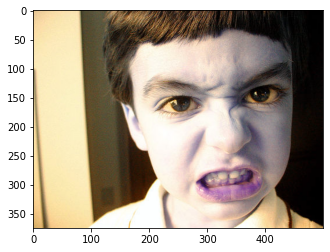

In [21]:
plt.imshow(img)

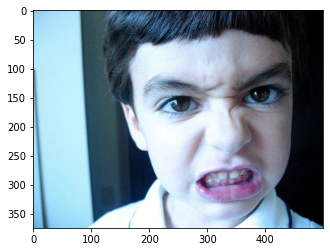

In [22]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [24]:
predictions = Deepface.analyse

# rectangle across face

In [25]:
faceCascade = cv2.CascadeClassifier(cv2.data.harcascades + 'haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
face = faceCascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

# writing mood/emotion

In [26]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,
                predictions['dominant_emotion'],
                (0,50),
                font,1,
                (0,0,255),
                2,
                cv2.LINE_4);

In [27]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Video demo for Face Emotion Recognition

In [28]:
import cv2
from deepface import DeepFace

faceCascade = cv2.CascadeClassifier(cv2.data.harcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.videoCapture(1)
#check if webcam opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")
    
while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(frame, actions = ['emotion'])
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    #draw rectangle around the face
    for(x,y,w,h) in faces:
         cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,
                result['dominant_emotion'],
                (50,50),
                font,3,
                (0,0,255),
                2,
                cv2.LINE_4);
    cv2.imshow('Original video',frame)
    
    if cv2.waitkey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()